In [1]:
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from sklearn.preprocessing import MinMaxScaler

import scipy

In [2]:
yearlyProfit = 0.04

# PART1

## Data Collection and Processing

In [3]:
coins = ["BTC-USD", "ETH-USD", "XRP-USD", "BNB-USD"]
datas = yf.download(coins, start = "2023-08-01" , end = "2024-12-01", interval="1d")

[*********************100%***********************]  4 of 4 completed


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
train = datas.loc[:"2024-07-31"].copy()
test = datas.loc["2024-08-01":].copy()

In [6]:
datas

Price            Close                                             High  \
Ticker         BNB-USD       BTC-USD      ETH-USD   XRP-USD     BNB-USD   
Date                                                                      
2023-08-01  247.505020  29675.732422  1871.792114  0.707211  247.505020   
2023-08-02  240.494644  29151.958984  1839.089722  0.685195  248.511551   
2023-08-03  241.061523  29178.679688  1835.136475  0.664135  241.583252   
2023-08-04  241.476013  29074.091797  1827.712891  0.635539  243.155472   
2023-08-05  242.959351  29042.126953  1834.987915  0.628423  243.027725   
...                ...           ...          ...       ...         ...   
2024-11-26  613.587280  91985.320312  3326.517334  1.401323  645.292969   
2024-11-27  644.948486  95962.531250  3657.249268  1.472812  646.851807   
2024-11-28  654.361633  95652.468750  3579.811523  1.541343  663.021973   
2024-11-29  654.809753  97461.523438  3593.494385  1.796731  663.324707   
2024-11-30  654.329163  96449.054688  3705.705322  1.944121  676.924438   

Price                                                   Low                \
Ticker           BTC-USD      ETH-USD   XRP-USD     BNB-USD       BTC-USD   
Date                                                                        
2023-08-01  29675.732422  1873.029907  0.707211  238.530243  28657.023438   
2023-08-02  29987.998047  1877.511475  0.707087  236.891769  28946.509766   
2023-08-03  29375.707031  1856.407593  0.686761  238.509644  28959.488281   
2023-08-04  29302.078125  1847.912231  0.666442  240.452286  28885.335938   
2023-08-05  29102.464844  1836.464844  0.635532  240.090393  28957.796875   
...                  ...          ...       ...         ...           ...   
2024-11-26  94991.750000  3461.292969  1.456542  600.991272  90770.812500   
2024-11-27  97361.179688  3687.009033  1.518370  608.621460  91778.664062   
2024-11-28  96650.203125  3664.878174  1.542370  641.617065  94677.351562   
2024-11-29  98693.171875  3647.264404  1.811531  649.163208  95407.882812   
2024-11-30  97499.343750  3739.934814  1.954907  648.892395  96144.218750   

Price                                    Open                             \
Ticker          ETH-USD   XRP-USD     BNB-USD       BTC-USD      ETH-USD   
Date                                                                       
2023-08-01  1817.920776  0.683532  241.128052  29230.873047  1856.190186   
2023-08-02  1822.348267  0.680232  247.490311  29704.146484  1873.468140   
2023-08-03  1825.347778  0.658851  240.509979  29161.812500  1838.897949   
2023-08-04  1817.413818  0.630304  241.042862  29174.382812  1834.890503   
2023-08-05  1824.807983  0.612637  241.489670  29075.388672  1827.798584   
...                 ...       ...         ...           ...          ...   
2024-11-26  3255.542969  1.294805  636.639709  93087.281250  3412.950928   
2024-11-27  3303.567871  1.357346  613.587280  91978.140625  3326.029053   
2024-11-28  3531.870605  1.434183  644.948486  95954.945312  3656.609619   
2024-11-29  3538.446777  1.527908  654.361755  95653.953125  3579.910645   
2024-11-30  3572.254150  1.770554  654.809753  97468.812500  3593.598145   

Price                     Volume                                         
Ticker       XRP-USD     BNB-USD      BTC-USD      ETH-USD      XRP-USD  
Date                                                                     
2023-08-01  0.698503   830645013  18272392391   7634860636   1438067858  
2023-08-02  0.707087   650256385  19212655598   6448512422   1132335650  
2023-08-03  0.685180   400525696  12780357746   4710581074   1414576525  
2023-08-04  0.664088   370373499  12036639988   4861242484   1342066974  
2023-08-05  0.635532   300760369   6598366353   2866049749   1142144189  
...              ...         ...          ...          ...          ...  
2024-11-26  1.415367  2637257322  91656519855  39902959158   9378581138  
2024-11-27  1.401312  2393610865  71133452438  43383987191   7766

In [7]:
train.shape, train.iloc[0]

((366, 20),
 Price   Ticker 
 Close   BNB-USD    2.475050e+02
         BTC-USD    2.967573e+04
         ETH-USD    1.871792e+03
         XRP-USD    7.072110e-01
 High    BNB-USD    2.475050e+02
         BTC-USD    2.967573e+04
         ETH-USD    1.873030e+03
         XRP-USD    7.072110e-01
 Low     BNB-USD    2.385302e+02
         BTC-USD    2.865702e+04
         ETH-USD    1.817921e+03
         XRP-USD    6.835320e-01
 Open    BNB-USD    2.411281e+02
         BTC-USD    2.923087e+04
         ETH-USD    1.856190e+03
         XRP-USD    6.985030e-01
 Volume  BNB-USD    8.306450e+08
         BTC-USD    1.827239e+10
         ETH-USD    7.634861e+09
         XRP-USD    1.438068e+09
 Name: 2023-08-01 00:00:00, dtype: float64)

In [8]:
test.shape, test.iloc[0]

((122, 20),
 Price   Ticker 
 Close   BNB-USD    5.751467e+02
         BTC-USD    6.535750e+04
         ETH-USD    3.201564e+03
         XRP-USD    5.964640e-01
 High    BNB-USD    5.772913e+02
         BTC-USD    6.559324e+04
         ETH-USD    3.241777e+03
         XRP-USD    6.294330e-01
 Low     BNB-USD    5.537516e+02
         BTC-USD    6.224894e+04
         ETH-USD    3.078544e+03
         XRP-USD    5.718840e-01
 Open    BNB-USD    5.763682e+02
         BTC-USD    6.462584e+04
         ETH-USD    3.231249e+03
         XRP-USD    6.239340e-01
 Volume  BNB-USD    2.045220e+09
         BTC-USD    4.097555e+10
         ETH-USD    2.021764e+10
         XRP-USD    1.990604e+09
 Name: 2024-08-01 00:00:00, dtype: float64)

In [9]:
train[("Close", "BTC-USD")]

Date
2023-08-01    29675.732422
2023-08-02    29151.958984
2023-08-03    29178.679688
2023-08-04    29074.091797
2023-08-05    29042.126953
                  ...     
2024-07-27    67813.335938
2024-07-28    68255.867188
2024-07-29    66819.914062
2024-07-30    66201.015625
2024-07-31    64619.250000
Name: (Close, BTC-USD), Length: 366, dtype: float64

# PART 2

## Calculate Returns of Close

In [10]:
for i in coins:
    train[("Returns", i)] = train[("Close", i)].pct_change() * 100

In [11]:
train[("Returns", "BTC-USD")]

Date
2023-08-01         NaN
2023-08-02   -1.764989
2023-08-03    0.091660
2023-08-04   -0.358439
2023-08-05   -0.109943
                ...   
2024-07-27   -0.145374
2024-07-28    0.652573
2024-07-29   -2.103780
2024-07-30   -0.926219
2024-07-31   -2.389337
Name: (Returns, BTC-USD), Length: 366, dtype: float64

## Plot ACF and PACF for Optimal p and q Values

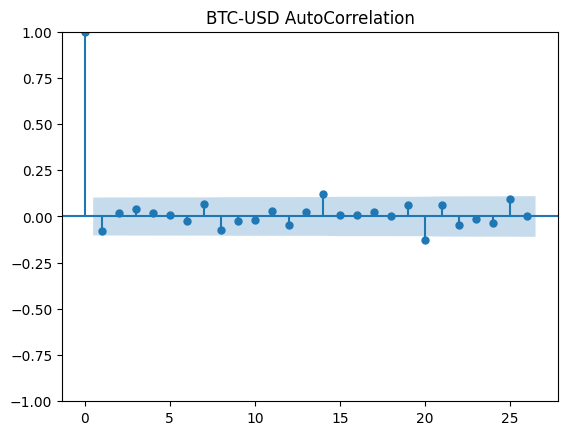

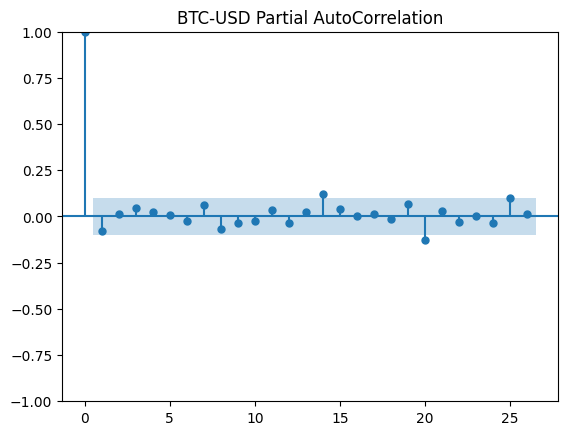

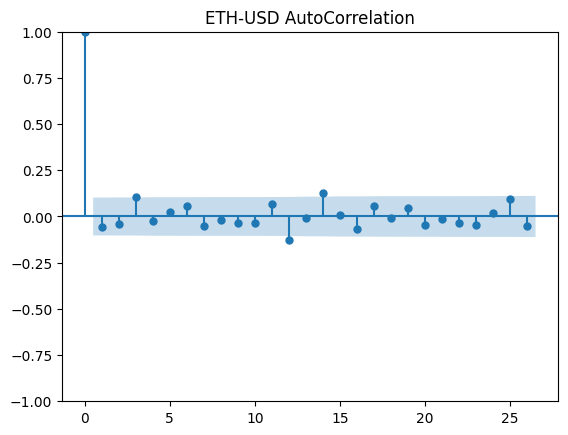

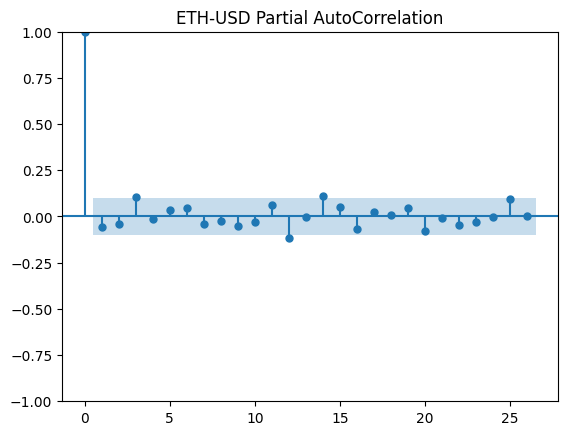

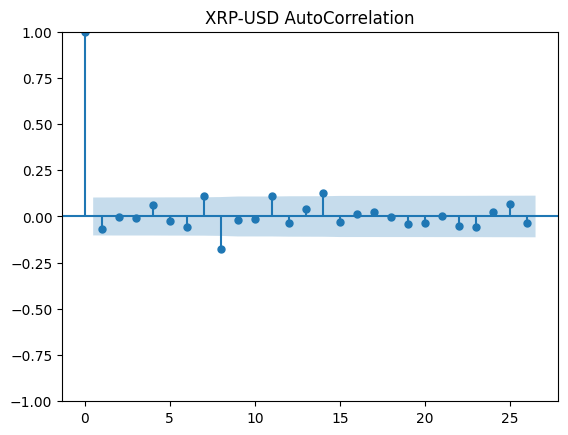

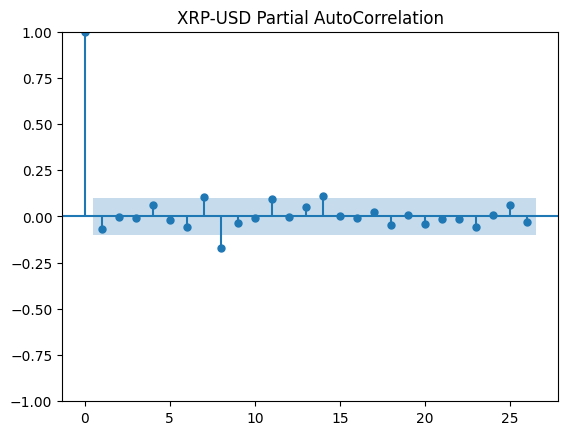

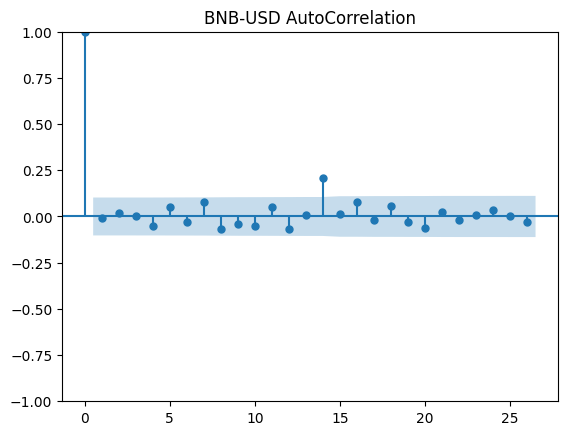

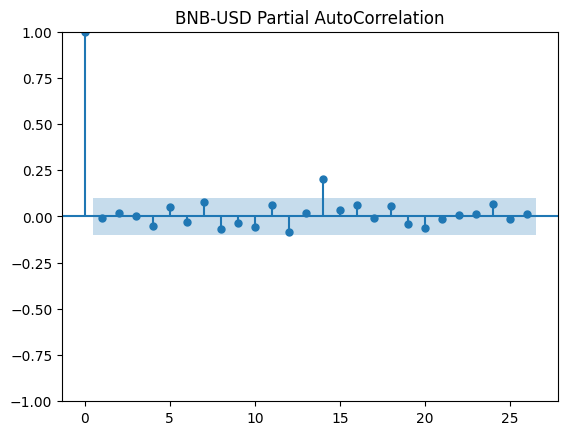

In [12]:
pq = dict()  # {"BTC-USD": [p, q], ...}
for i in coins:
    p = int(np.argmax(np.abs(acf(train[("Returns", i)].dropna())[1:6]))) + 1
    q = int(np.argmax(np.abs(pacf(train[("Returns", i)].dropna())[1:6]))) + 1
    pq[i] = [p, q]
    plot_acf(train[("Returns", i)].dropna(), title=f"{i} AutoCorrelation")
    plot_pacf(train[("Returns", i)].dropna(), title=f"{i} Partial AutoCorrelation")

In [13]:
print("asset: [p, q]")
pq

asset: [p, q]


{'BTC-USD': [1, 1], 'ETH-USD': [3, 3], 'XRP-USD': [1, 1], 'BNB-USD': [5, 5]}

## Volatility Models

DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001071. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

In [14]:
def garch(returns, p, q, window):

    vol = pd.Series(np.nan, index=returns.index)

    for i in returns.dropna().rolling(window=window):
        if len(i) == window:
            model = arch_model(i, vol="GARCH", p=p, q=q, rescale=None)
            fit_model = model.fit(disp="off", show_warning=False)
            forecast = fit_model.forecast()
            vol[forecast.variance.index] = forecast.variance

    return vol

def egarch(returns, p, q, window):

    vol = pd.Series(np.nan, index=returns.index)
    
    for i in returns.dropna().rolling(window=window):
        if len(i) == window:
            model = arch_model(i, vol="EGARCH", p=p, q=q, rescale=None)
            fit_model = model.fit(disp="off", show_warning=False)
            forecast = fit_model.forecast()
            vol[forecast.variance.index] = forecast.variance

    return vol

def figarch(returns, window):

    vol = pd.Series(np.nan, index=returns.index)
    
    for i in returns.dropna().rolling(window=window):
        if len(i) == window:
            model = arch_model(i, vol="FIGARCH", rescale=None)
            fit_model = model.fit(disp="off", show_warning=False)
            forecast = fit_model.forecast()
            vol[forecast.variance.index] = forecast.variance

    return vol

## Volatility Proxies

### Historical (Close-to-Close) Volatility

In [15]:
def historicalVolatility(returns, window):
    return returns.rolling(window=window).std()

### Parkinson Volatility

In [16]:
def parkinsonVolatility(high, low, window):
    return ( ( np.log(high/low) ** 2 ) * ( 1/( 4*np.log(2) ) ) ).rolling(window).mean() ** 0.5 # *np.sqrt(TRADING_DAYS)

### Garman-Klass Volatility

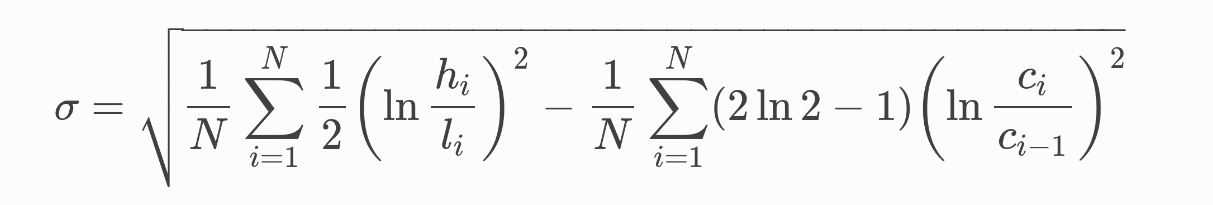

In [17]:
def garmanVolatility(high, low, op, close, window):
    hl = np.log(high/low) ** 2
    co = np.log(close/op) ** 2
    # cc_1 = np.log( close/close.shift(1) ) ** 2

    formula = (0.5*hl) - (2*np.log(2)-1) * co
    return formula.rolling(window).mean() ** 0.5 #*np.sqrt(TRADING_DAYS)

### Yang Zhang Volatility

In [18]:
def yangVolatility(high, low, op, close, window, alpha=1.34):
    ho = np.log(high / op)
    lo = np.log(low / op)
    co = np.log(close / op)
    co_sq = co**2

    oc_1 = np.log(op/ close.shift(1))
    oc_1_sq = oc_1 ** 2

    #log_cc_1 = np.log(price_data["Close"] / price_data["Close"].shift(1))
    #log_cc_1_sq = log_cc_1 ** 2

    rogers = ho * (ho - co) + lo * (lo - co)

    open_to_close_vol = co_sq.rolling(window=window, center=False).sum() * (1.0 / (window - 1.0))
    overnight_vol = oc_1_sq.rolling(window=window, center=False).sum() * (1.0 / (window - 1.0))

    rogers_vol = rogers.rolling(window=window, center=False).sum() * (1.0 / (window - 1.0))

    k = (alpha-1) / (alpha + (window + 1) / (window - 1))

    return (overnight_vol + k * open_to_close_vol + (1 - k) * rogers_vol) ** 0.5 #* math.sqrt(periods)

## Generate 7 and 30 Day Window for Assets

In [19]:
modes = ["garch", "egarch", "figarch", "hist", "parkinson", "garman", "yang"]

In [20]:
cols = []
for i in modes:
    for j in coins:
        for k in ["7-day", "30-day", "Mean"]:
            cols.append((i, j, k))
volatilities = pd.DataFrame(np.nan, index=train.index, columns=pd.MultiIndex.from_tuples(cols))
volatilities
# volatilities[("garch", "BTC-USD", "7-day")]  indexing example

garch                                                      \
           BTC-USD             ETH-USD             XRP-USD               
             7-day 30-day Mean   7-day 30-day Mean   7-day 30-day Mean   
Date                                                                     
2023-08-01     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-02     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-03     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-04     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-05     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
...            ...    ...  ...     ...    ...  ...     ...    ...  ...   
2024-07-27     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-28     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-29     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-30     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-31     NaN    NaN  NaN     NaN    NaN  NaN     NaN    NaN  NaN   

                    ...    yang                                          \
           BNB-USD  ... BTC-USD ETH-USD             XRP-USD               
             7-day  ...    Mean   7-day 30-day Mean   7-day 30-day Mean   
Date                ...                                                   
2023-08-01     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-02     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-03     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-04     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2023-08-05     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
...            ...  ...     ...     ...    ...  ...     ...    ...  ...   
2024-07-27     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-28     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-29     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-30     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   
2024-07-31     NaN  ...     NaN     NaN    NaN  NaN     NaN    NaN  NaN   

                                
           BNB-USD              
             7-day 30-day Mean  
Date                            
2023-08-01     NaN    NaN  NaN  
2023-08-02     NaN    NaN  NaN  
2023-08-03     NaN    NaN  NaN  
2023-08-04     NaN    NaN  NaN  
2023-08-05     NaN    NaN  NaN  
...            ...    ...  ...  
2024-07-27     NaN    NaN  NaN  
2024-07-28     NaN    NaN  NaN  
2024-07-29     NaN    NaN  NaN  
2024-07-30     NaN    NaN  NaN  
2024-07-31     NaN    NaN  NaN  

[366 rows x 84 columns]

In [21]:
for j in coins:
    for k in [7, 30]:
        print(f"asset {j} window {k} ...")
        window_col = "7-day" if k==7 else "30-day"

        volatilities[("garch", j, window_col)] = garch( train[("Returns", j)], p=pq[j][0], q=pq[j][1], window=k )

        volatilities[("egarch", j, window_col)] = egarch( train[("Returns", j)], p=pq[j][0], q=pq[j][1], window=k )

        volatilities[("figarch", j, window_col)] = figarch( train[("Returns", j)], window=k )

        volatilities[("hist", j, window_col)] = historicalVolatility( train[("Returns"), j], window=k )
        
        volatilities[("parkinson", j, window_col)] = parkinsonVolatility(train[("High", j)], train[("Low", j)], window=k)
        
        volatilities[("garman", j, window_col)] = garmanVolatility(train[("High", j)], train[("Low", j)], train[("Open", j)], train[("Close", j)], window=k)
        
        volatilities[("yang", j, window_col)] = yangVolatility(train[("High", j)], train[("Low", j)], train[("Open", j)], train[("Close", j)], window=k)
        

asset BTC-USD window 7 ...
asset BTC-USD window 30 ...
asset ETH-USD window 7 ...
asset ETH-USD window 30 ...
asset XRP-USD window 7 ...
asset XRP-USD window 30 ...
asset BNB-USD window 7 ...
asset BNB-USD window 30 ...


In [22]:
volatilities.tail(10)

garch                                                     \
             BTC-USD                   ETH-USD                  XRP-USD   
               7-day    30-day Mean      7-day    30-day Mean     7-day   
Date                                                                      
2024-07-22  3.247800  6.654747  NaN   0.018454  8.167988  NaN  0.101066   
2024-07-23  4.327109  6.613432  NaN   0.021371  7.802160  NaN  6.863122   
2024-07-24  3.025689  6.420730  NaN   2.506048  8.353143  NaN  4.447208   
2024-07-25  1.454200  6.218472  NaN  17.324387  9.223608  NaN  7.615396   
2024-07-26  4.046177  6.343300  NaN  18.386955  9.807205  NaN  6.132665   
2024-07-27  3.276267  6.126476  NaN   9.542878  8.926423  NaN  4.808937   
2024-07-28  2.374848  4.143156  NaN   4.694120  8.672020  NaN  2.446731   
2024-07-29  3.107203  4.095040  NaN   5.777443  6.888518  NaN  0.108742   
2024-07-30  2.585557  3.750207  NaN   1.518107  6.053343  NaN  4.801145   
2024-07-31  2.794406  3.734826  NaN   1.986116  5.061214  NaN  4.115334   

                                      ...    yang                           \
                             BNB-USD  ... BTC-USD   ETH-USD                  
               30-day Mean     7-day  ...    Mean     7-day    30-day Mean   
Date                                  ...                                    
2024-07-22   4.398728  NaN  0.983241  ...     NaN  0.027447  0.028315  NaN   
2024-07-23   5.699538  NaN  1.546928  ...     NaN  0.026584  0.028557  NaN   
2024-07-24  13.033624  NaN  5.224946  ...     NaN  0.026619  0.028059  NaN   
2024-07-25  15.824285  NaN  0.210748  ...     NaN  0.031483  0.029256  NaN   
2024-07-26   4.156074  NaN  3.079519  ...     NaN  0.029905  0.029210  NaN   
2024-07-27   6.753310  NaN  2.934467  ...     NaN  0.031481  0.029432  NaN   
2024-07-28   4.421425  NaN  0.075821  ...     NaN  0.029775  0.029363  NaN   
2024-07-29   4.581070  NaN  4.102285  ...     NaN  0.030951  0.029811  NaN   
2024-07-30  18.691268  NaN  0.222604  ...     NaN  0.030703  0.029999  NaN   
2024-07-31   8.545534  NaN  3.905342  ...     NaN  0.030728  0.030179  NaN   

                                                              
             XRP-USD                  BNB-USD                 
               7-day    30-day Mean     7-day    30-day Mean  
Date                                                          
2024-07-22  0.051655  0.040287  NaN  0.026518  0.030543  NaN  
2024-07-23  0.048556  0.040728  NaN  0.021690  0.030570  NaN  
2024-07-24  0.047542  0.041063  NaN  0.021516  0.030131  NaN  
2024-07-25  0.042419  0.041606  NaN  0.023508  0.030574  NaN  
2024-07-26  0.037657  0.041763  NaN  0.020488  0.030453  NaN  
2024-07-27  0.036842  0.041921  NaN  0.021633  0.030508  NaN  
2024-07-28  0.034954  0.042053  NaN  0.020171  0.030423  NaN  
2024-07-29  0.032273  0.042178  NaN  0.022267  0.030800  NaN  
2024-07-30  0.032250  0.042631  NaN  0.022854  0.030914  NaN  
2024-07-31  0.033897  0.043418  NaN  0.022511  0.030979  NaN  

[10 rows x 84 columns]

# PART 3

## Step 1

### Mean of 7-day and 30-day Window

In [23]:
for i in modes:
    for j in coins:
        volatilities[(i, j, "Mean")] = (volatilities[(i, j, "7-day")]+volatilities[(i, j, "30-day")])/2

#volatilities
volatilities[("garch")].tail(10)

BTC-USD                        ETH-USD                       \
               7-day    30-day      Mean      7-day    30-day       Mean   
Date                                                                       
2024-07-22  3.247800  6.654747  4.951273   0.018454  8.167988   4.093221   
2024-07-23  4.327109  6.613432  5.470270   0.021371  7.802160   3.911766   
2024-07-24  3.025689  6.420730  4.723209   2.506048  8.353143   5.429595   
2024-07-25  1.454200  6.218472  3.836336  17.324387  9.223608  13.273997   
2024-07-26  4.046177  6.343300  5.194739  18.386955  9.807205  14.097080   
2024-07-27  3.276267  6.126476  4.701371   9.542878  8.926423   9.234651   
2024-07-28  2.374848  4.143156  3.259002   4.694120  8.672020   6.683070   
2024-07-29  3.107203  4.095040  3.601121   5.777443  6.888518   6.332981   
2024-07-30  2.585557  3.750207  3.167882   1.518107  6.053343   3.785725   
2024-07-31  2.794406  3.734826  3.264616   1.986116  5.061214   3.523665   

             XRP-USD                         BNB-USD                      
               7-day     30-day       Mean     7-day    30-day      Mean  
Date                                                                      
2024-07-22  0.101066   4.398728   2.249897  0.983241  9.138041  5.060641  
2024-07-23  6.863122   5.699538   6.281330  1.546928  5.798368  3.672648  
2024-07-24  4.447208  13.033624   8.740416  5.224946  6.237211  5.731078  
2024-07-25  7.615396  15.824285  11.719841  0.210748  5.038063  2.624406  
2024-07-26  6.132665   4.156074   5.144369  3.079519  6.376796  4.728157  
2024-07-27  4.808937   6.753310   5.781124  2.934467  4.473976  3.704221  
2024-07-28  2.446731   4.421425   3.434078  0.075821  4.196435  2.136128  
2024-07-29  0.108742   4.581070   2.344906  4.102285  4.869163  4.485724  
2024-07-30  4.801145  18.691268  11.746206  0.222604  2.887932  1.555268  
2024-07-31  4.115334   8.545534   6.330434  3.905342  3.757829  3.831585

## Step 2

### Calculate Market Caps

In [24]:
mcaps = {}
for c in coins:
    coin = yf.Ticker(c)
    mcaps[c] = coin.info["marketCap"]
total_caps = sum(mcaps.values())
mcaps

{'BTC-USD': 2039415832576,
 'ETH-USD': 390805159936,
 'XRP-USD': 174979596288,
 'BNB-USD': 95001436160}

### Calculate Market Weights Based Market Capacities

In [25]:
market_weights = {}
for c in coins:
    market_weights[c] = mcaps[c] / total_caps
market_weights = pd.Series(market_weights)

In [26]:
market_weights

BTC-USD    0.755283
ETH-USD    0.144732
XRP-USD    0.064802
BNB-USD    0.035183
dtype: float64

### Black Litterman Model

In [27]:
def blackLitterman(returns, vol, market_weights, coins):

    # Model Params
    tao = 0.025
    risk_aversion = 2.5
    omega = np.diag([0.05] * len(market_weights))  # View Matrix(Uncertainty)
    P = np.eye(len(market_weights))  # Neutral Views by np.eye function(Identity Matrix)
    Q = np.array([vol[c].mean() for c in coins])  # Volatilities Mean

    # I: Covariance Matrix of Returns
    cov_matrix = returns.cov()

    # II: Calculate Prior Returns(Equiliberium Returns)
    w_mkt = market_weights.values
    pi = risk_aversion * cov_matrix.dot(w_mkt)

    # III: Calculate Posterior Returns and Posterior Covariance Matrix
    middle_term = np.linalg.inv(np.linalg.inv(tao * cov_matrix) + P.T @ np.linalg.inv(omega) @ P)
    adjusted_return = middle_term @ (np.linalg.inv(tao * cov_matrix) @ pi + P.T @ np.linalg.inv(omega) @ Q)
    posterior_cov_matrix = cov_matrix + middle_term

    # IV: Sharpe Ratio Optimization( Max Sharpe )
    def neg_sharpe(weights):
        # Constraint: Weights from 0 to 0.5
        weights = np.clip(weights, 0, 0.5)
        portfolio_return = weights.T @ adjusted_return
        portfolio_vol = np.sqrt(weights.T @ posterior_cov_matrix @ weights)
        return -portfolio_return / portfolio_vol  # Negative Sharpe for Maximizing

    # Constraints for Optimization
    num_assets = len(coins)


    def sumWeightsToOne(weights):
        return np.sum(weights) - 1
    
    constraints = [{"type": "eq", "fun": sumWeightsToOne}]

    bounds = [(0, 0.5) for _ in range(num_assets)]  # Individual Weights from 0 to 0.5

    # Initial Weights
    initial_weights = np.array([1.0 / num_assets] * num_assets)

    # Minimize Negative Sharpe ratio => Maximize Sharpe Ratio
    minimization = scipy.optimize.minimize(neg_sharpe, initial_weights, bounds=bounds, constraints=constraints)

    final_weights = minimization.x
    max_sharpe = -minimization.fun

    return final_weights, max_sharpe

In [28]:
volatilites_mean_tuples = [(i, "Mean") for i in coins]
weights = {}
for i in modes:
    
    final_weights, max_sharpe = blackLitterman(
                                                returns=train[("Returns", )].dropna(),
                                                vol=volatilities[(i)][volatilites_mean_tuples].droplevel(1, axis=1).dropna(),
                                                market_weights=market_weights,
                                                coins=coins)

    weights[i] = final_weights

    print(i)
    print(final_weights)
    print(max_sharpe)
    print()
    

garch
[0.43577364 0.07531825 0.17829213 0.31061598]
3.7669750309562593

egarch
[0.25 0.25 0.25 0.25]
nan

figarch
[0.48115056 0.06592506 0.21418162 0.23874277]
3.6506048077045508

hist
[0.5        0.21189796 0.13709172 0.15101032]
1.6548388731683212

parkinson
[0.5        0.46855895 0.01275507 0.01868598]
0.680929247587584

garman
[0.5        0.46833902 0.01308865 0.01857233]
0.6809935590516222

yang
[0.5        0.46782357 0.01339235 0.01878408]
0.6814451092943217



# PART 4

In [29]:
weights

{'garch': array([0.43577364, 0.07531825, 0.17829213, 0.31061598]),
 'egarch': array([0.25, 0.25, 0.25, 0.25]),
 'figarch': array([0.48115056, 0.06592506, 0.21418162, 0.23874277]),
 'hist': array([0.5       , 0.21189796, 0.13709172, 0.15101032]),
 'parkinson': array([0.5       , 0.46855895, 0.01275507, 0.01868598]),
 'garman': array([0.5       , 0.46833902, 0.01308865, 0.01857233]),
 'yang': array([0.5       , 0.46782357, 0.01339235, 0.01878408])}

## Backtest Function

In [30]:
def backtestPortfolio(assets, weights, initial_capital = 1000.0, commission=0.02)-> pd.Series:

    for i in coins:
        assets[("Returns", i)] = assets[("Close", i)].pct_change()

    cumulative_returns = assets[("Returns", )].dropna().copy()
    cumulative_returns.iloc[0] = 0

    # buy comission
    daily_equity_coins = assets[("Returns", )].dropna().copy()
    daily_equity_coins.iloc[0] = (initial_capital * weights)*(1-commission)

    # backtest
    cumulative_returns[1:] = (assets[("Returns", )][2:] * weights).cumsum()
    daily_equity_coins[1:] = (assets[("Returns", )][2:].cumsum()+1) * ((initial_capital * weights) * (1-commission))

    # sell comission
    daily_equity_coins.iloc[-1] = daily_equity_coins.iloc[-1] * (1-commission)
    
    
    return cumulative_returns, daily_equity_coins

## Metrics

In [31]:
def maxDrawdown(daily_equity: pd.Series) -> pd.Series:
    roll_max = daily_equity.cummax()
    drawdown = ((daily_equity - roll_max) / roll_max) * 100
    max_drawdown = drawdown.min()

    return max_drawdown

def sharpeRatio(daily_equity: pd.Series) -> np.float64:
    
    daily_returns = daily_equity.pct_change().dropna()
    excess_returns = daily_returns - yearlyProfit / 252
    mean_excess_return = excess_returns.mean()
    std_excess_return = excess_returns.std()
    sharpe_ratio = mean_excess_return / std_excess_return * np.sqrt(252)

    return sharpe_ratio

def netProfit(daily_equity: pd.Series) -> np.float64:
    return daily_equity.iloc[-1] - daily_equity.iloc[0]

## Train Results

In [32]:
for idx, mode in enumerate(weights):
    cumulative, equity = backtestPortfolio(train, weights[mode])
    daily_equity = equity.sum(axis=1)
    print(f"{mode} Metrics:")
    print(f"\tSharpe Ratio: {sharpeRatio(daily_equity)}")
    print(f"\tNet Profit: {netProfit(daily_equity)}")
    print(f"\tMaxDrawdown: {maxDrawdown(daily_equity)}")
    print()

garch Metrics:
	Sharpe Ratio: 1.4101109887960694
	Net Profit: 732.022124699009
	MaxDrawdown: -18.56090493386501

egarch Metrics:
	Sharpe Ratio: 1.2071781236355354
	Net Profit: 634.6110255276471
	MaxDrawdown: -20.03162053482653

figarch Metrics:
	Sharpe Ratio: 1.3393419567012022
	Net Profit: 697.6668576029924
	MaxDrawdown: -18.992341585040677

hist Metrics:
	Sharpe Ratio: 1.3790884923764373
	Net Profit: 722.4698652993698
	MaxDrawdown: -18.045811455236123

parkinson Metrics:
	Sharpe Ratio: 1.3924839483872535
	Net Profit: 759.3251429968244
	MaxDrawdown: -16.575105111477104

garman Metrics:
	Sharpe Ratio: 1.392096546464144
	Net Profit: 759.0880697882711
	MaxDrawdown: -16.579286004755257

yang Metrics:
	Sharpe Ratio: 1.3920230559138742
	Net Profit: 758.9651758242719
	MaxDrawdown: -16.58291475888667



## Test Results

In [33]:
for idx, mode in enumerate(weights):
    cumulative, equity = backtestPortfolio(test, weights[mode])
    daily_equity = equity.sum(axis=1)
    print(f"{mode} Metrics:")
    print(f"\tSharpe Ratio: {sharpeRatio(daily_equity)}")
    print(f"\tNet Profit: {netProfit(daily_equity)}")
    print(f"\tMaxDrawdown: {maxDrawdown(daily_equity)}")
    print()

garch Metrics:
	Sharpe Ratio: 2.3710300334943977
	Net Profit: 516.9627520022361
	MaxDrawdown: -16.398971145840182

egarch Metrics:
	Sharpe Ratio: 2.361498459490271
	Net Profit: 560.3837158716403
	MaxDrawdown: -17.118734942231928

figarch Metrics:
	Sharpe Ratio: 2.5364194589192657
	Net Profit: 568.6287945127494
	MaxDrawdown: -16.16369227665172

hist Metrics:
	Sharpe Ratio: 2.155205754488567
	Net Profit: 496.9244526795201
	MaxDrawdown: -16.983736050943218

parkinson Metrics:
	Sharpe Ratio: 1.528860573715495
	Net Profit: 374.692994842242
	MaxDrawdown: -18.62538783258147

garman Metrics:
	Sharpe Ratio: 1.5302037306937162
	Net Profit: 375.05283434122055
	MaxDrawdown: -18.62336330591024

yang Metrics:
	Sharpe Ratio: 1.5315617071244096
	Net Profit: 375.3589907159219
	MaxDrawdown: -18.619607041396385



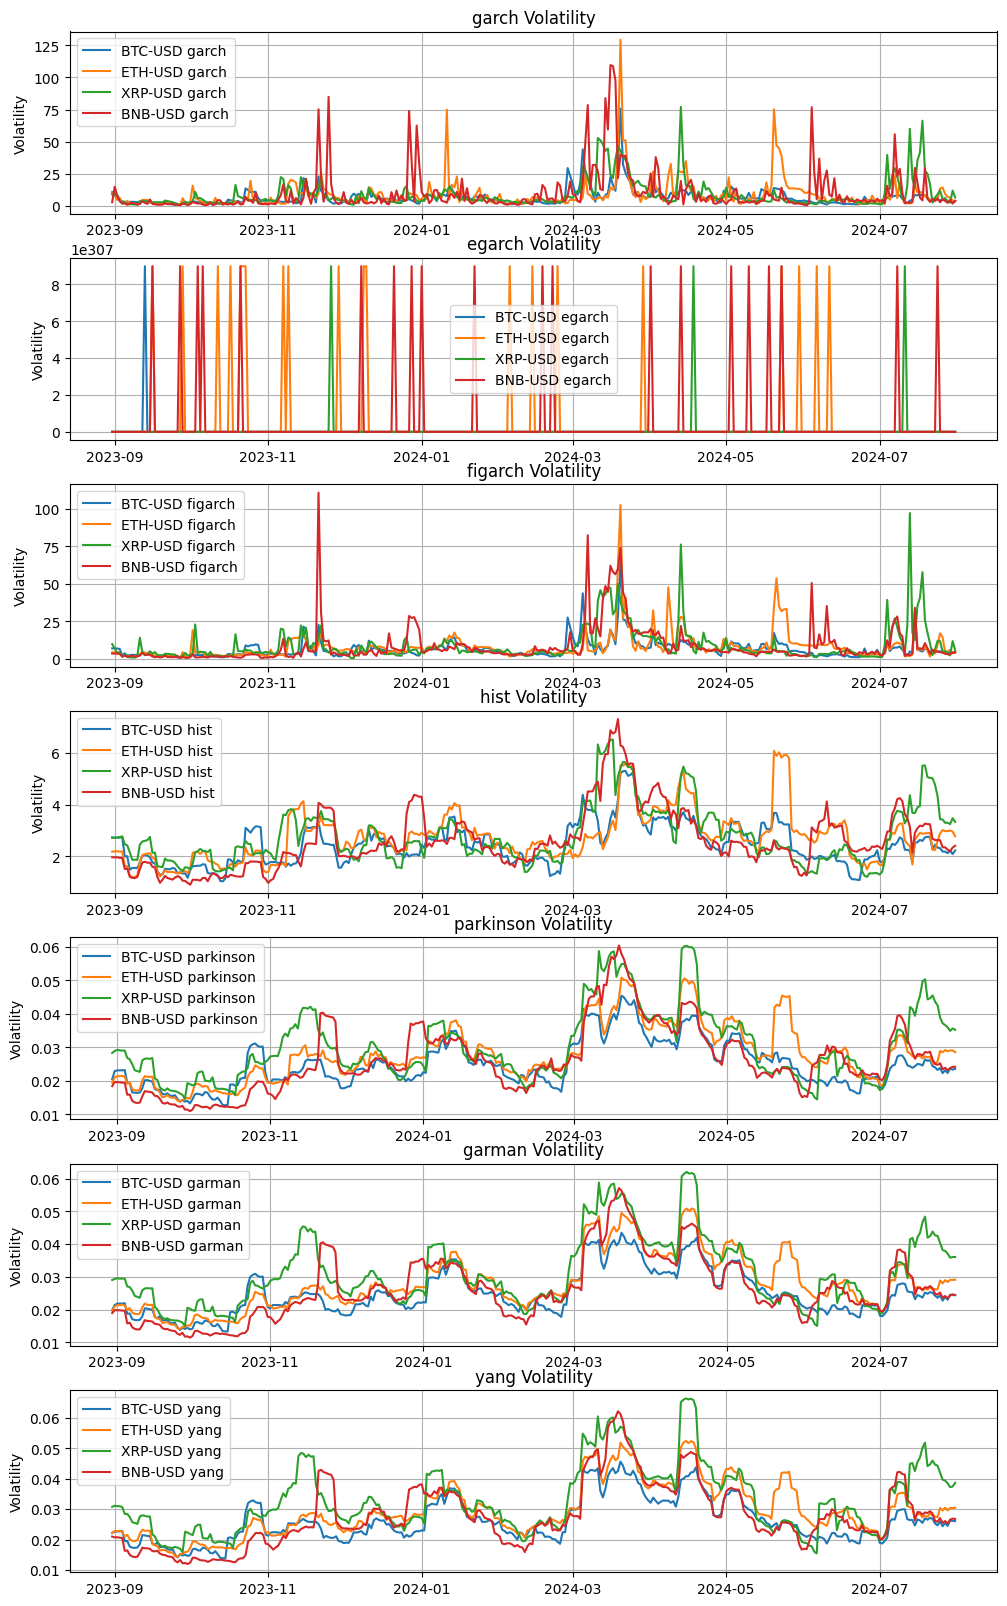

In [34]:
fig, axs = plt.subplots( len(weights), 1 , figsize=(10, 16))
fig.tight_layout()
for idx, mode in enumerate(weights):
    for c in coins:
        axs[idx].plot(volatilities[(mode, c, "Mean")].dropna(), label=f"{c} {mode}")
        axs[idx].set_title(f'{mode} Volatility')
        axs[idx].set_ylabel('Volatility')
        axs[idx].legend()
        axs[idx].grid(True)

In [38]:
for mode in weights:
    print(f"{mode}\t{weights[mode]}")

garch	[0.43577364 0.07531825 0.17829213 0.31061598]
egarch	[0.25 0.25 0.25 0.25]
figarch	[0.48115056 0.06592506 0.21418162 0.23874277]
hist	[0.5        0.21189796 0.13709172 0.15101032]
parkinson	[0.5        0.46855895 0.01275507 0.01868598]
garman	[0.5        0.46833902 0.01308865 0.01857233]
yang	[0.5        0.46782357 0.01339235 0.01878408]


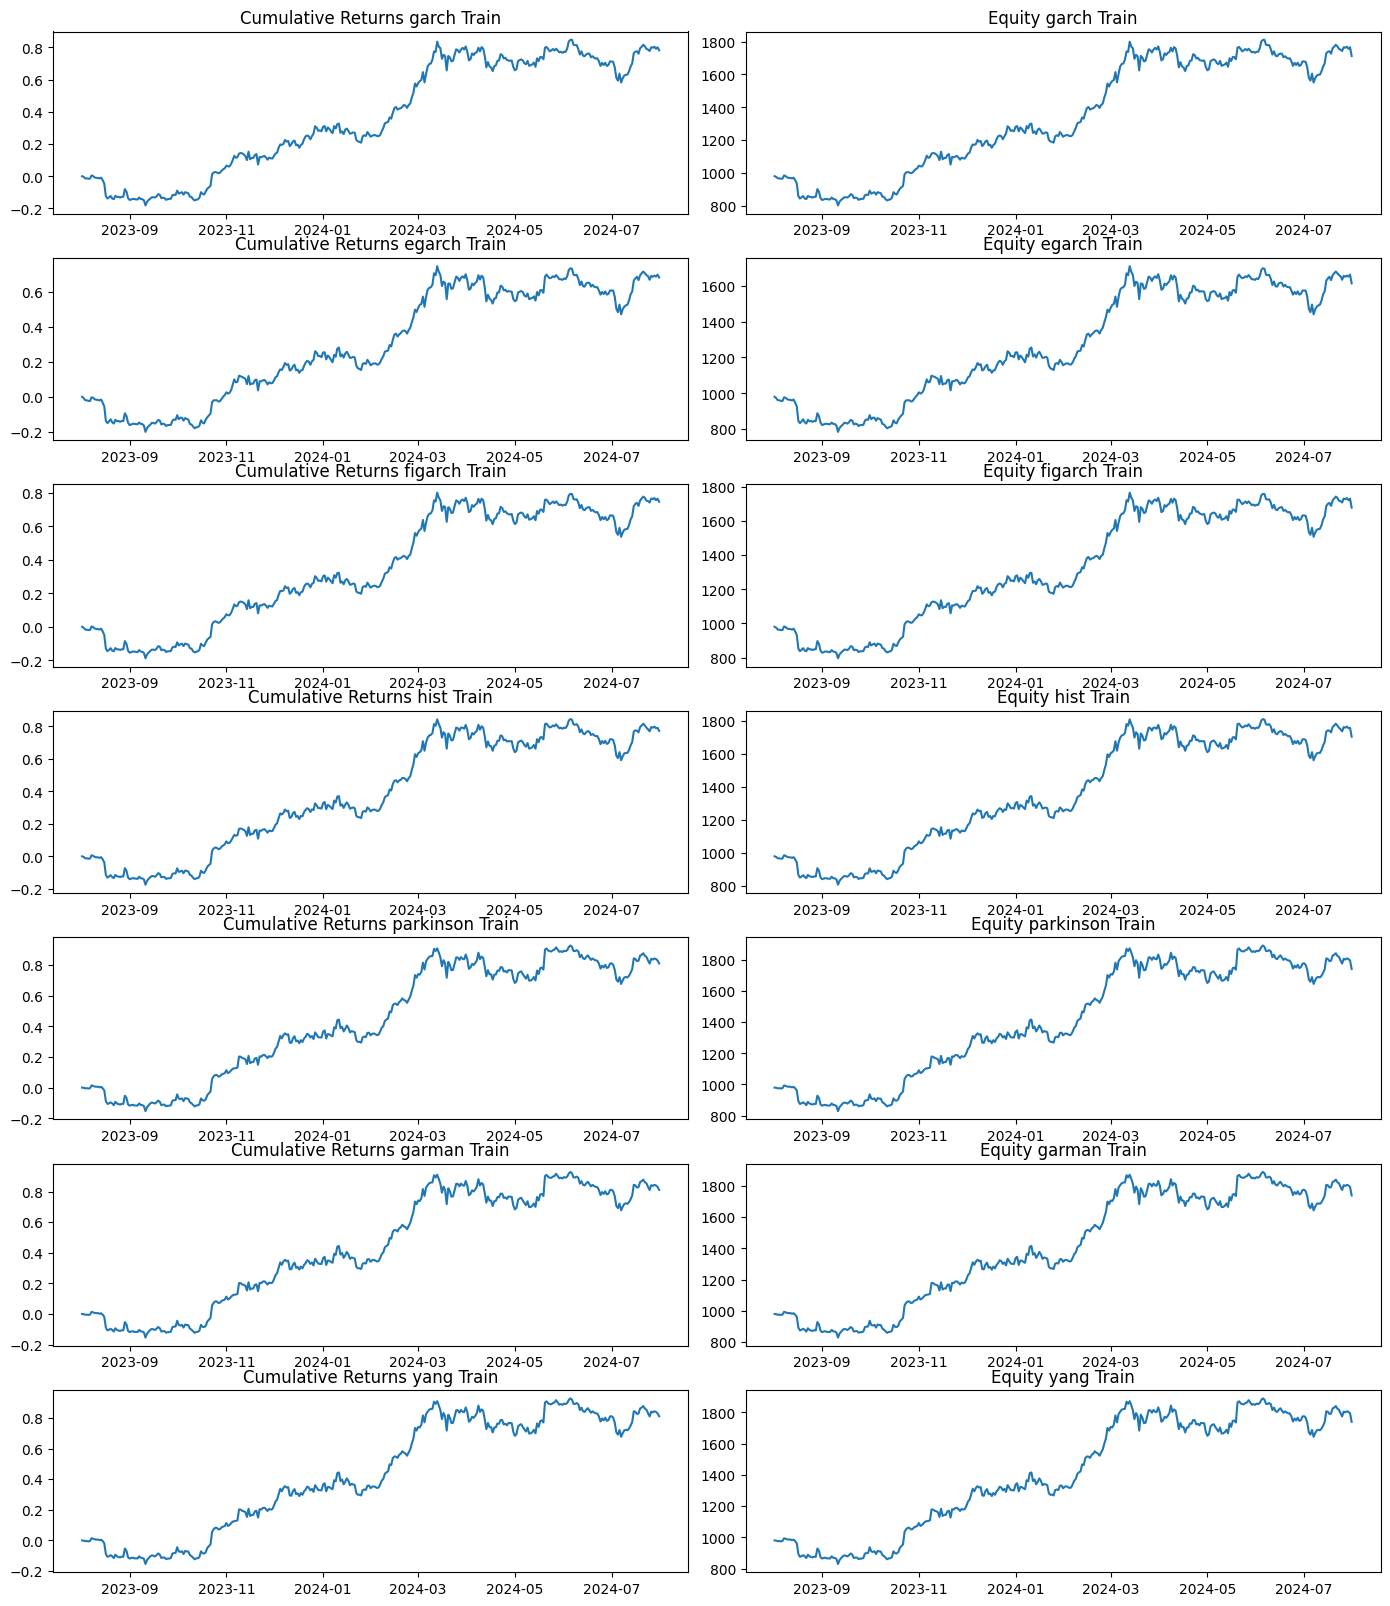

In [35]:
fig, axs = plt.subplots( len(weights), 2 , figsize=(14, 16))
fig.tight_layout()
for idx, mode in enumerate(weights):
    cumulative, equity = backtestPortfolio(train, weights[mode])
    axs[idx, 0].plot(cumulative.sum(axis=1))
    axs[idx, 0].set_title(f"Cumulative Returns {mode} Train")
    axs[idx, 1].plot(equity.sum(axis=1))
    axs[idx, 1].set_title(f"Equity {mode} Train")

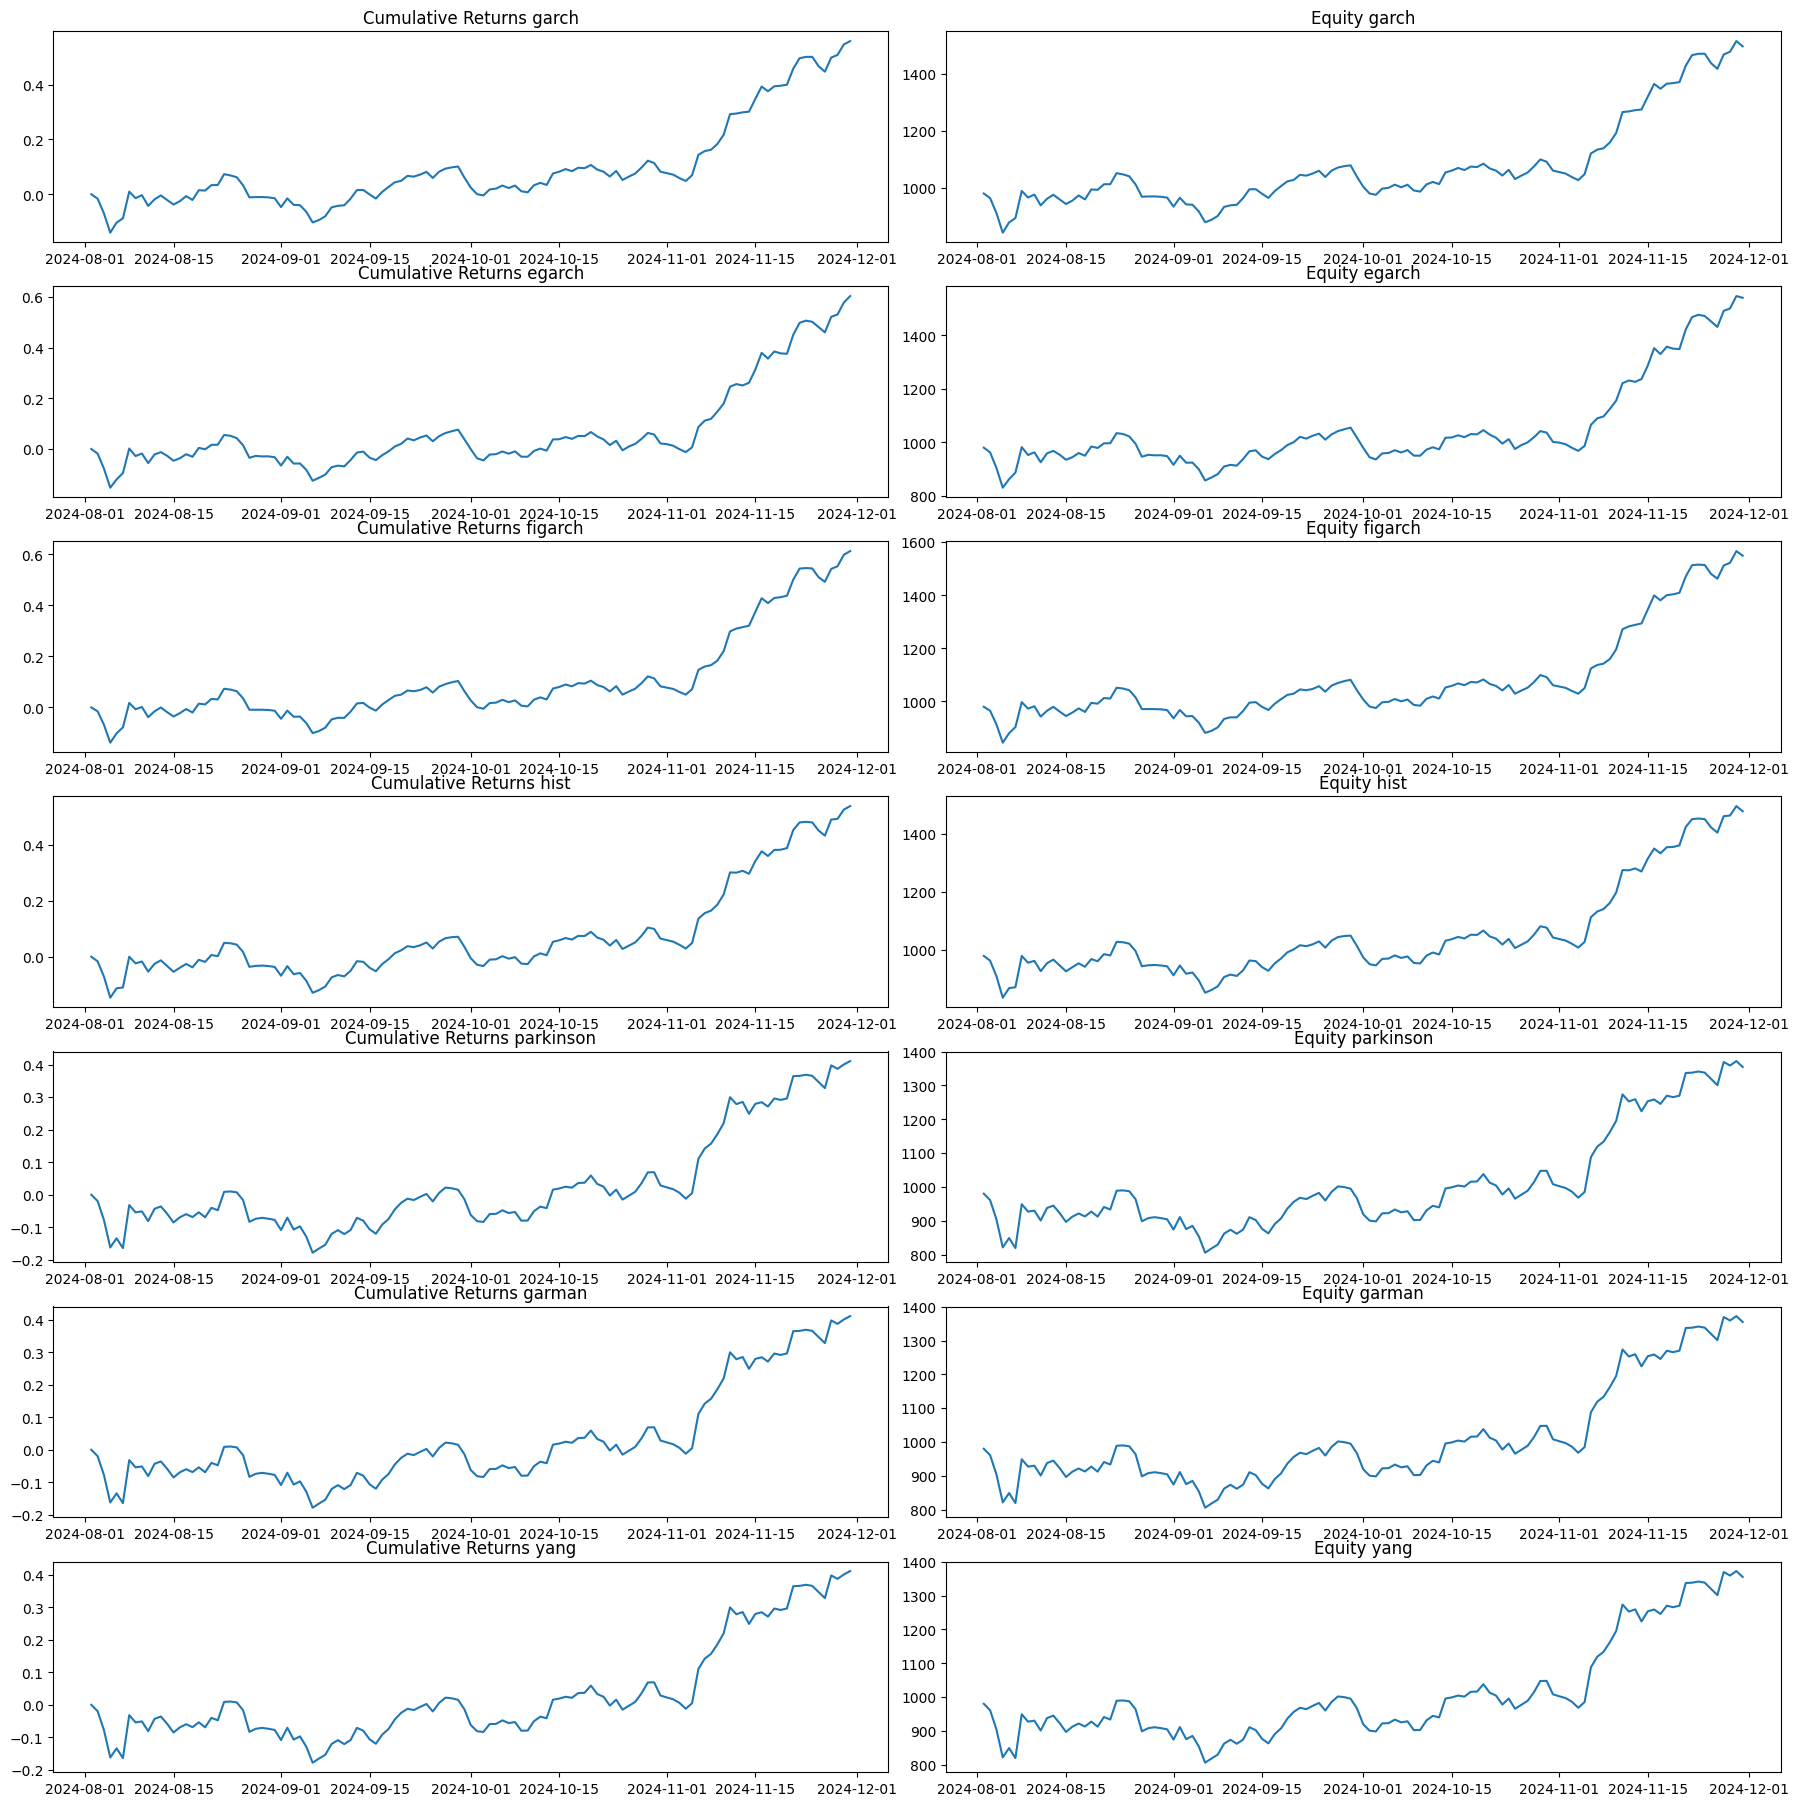

In [36]:
fig, axs = plt.subplots( len(weights), 2 , figsize=(18, 18))
fig.tight_layout()
for idx, mode in enumerate(weights):
    cumulative, equity = backtestPortfolio(test, weights[mode])
    axs[idx, 0].plot(cumulative.sum(axis=1))
    axs[idx, 0].set_title(f"Cumulative Returns {mode}")
    axs[idx, 1].plot(equity.sum(axis=1))
    axs[idx, 1].set_title(f"Equity {mode}")